# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2025/)    
## 1MS041, 2025 
&copy;2025 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Pattern Recognition

Traditionally the machine learning started in principle with a single algorithm called the perceptron algorithm. The ideas come from computer science and as such the focus and terminology is different, but let us stick to the terminology used in the book "Foundations of Data Science" Chap 5.

Let us say that we are trying to device a decision rule based on input data being in $\mathbb{R}^d$, it could be binary or other. This input could be for instance the words being used in an email, where we have some form of dictionary where each word is represented by a dimension. The simplest form of decision problem is that of a binary decision, like in the case of logistic regression (the decision could be the most likely output). A commonly chosen example is that of email spam classification.

> Goal: find a "simple" rule that performs well on training data

## The perceptron algorithm

The perceptron algorithm tries to find a linear separator, i.e. a plane in $\mathbb{R}$ that separates the two classes. The task is thus to find $w$ and $t$ such that for the training data $S$, the data consists of pairs $(x_i,l_i)$ the $x_i$ represents our features and the $l_i$ our labels or target.

$$
\begin{aligned}
    w \cdot x_i > t \quad \text{for each $x_i$ labeled $+1$} \\
    w \cdot x_i < t \quad \text{for each $x_i$ labeled $-1$}
\end{aligned}
$$

Adding a new coordinate to our space allows us to consider $\hat x_i = (x_i,1)$ and $\hat w = (w,t)$, this allows us to rewrite the inequalities above as

$$
    (\hat w \cdot \hat x_i) l_i > 0.
$$

### The algorithm
1. $w = 0$
2. while there exists $x_i$ with $x_i l_i \cdot w \leq 0$, update $w := w+x_il_i$

In [1]:
import numpy as np

def gen_data(n_points=5,sep=1):
    np.random.seed(3)
    W = np.array([[1,-1],[1,1]])/np.sqrt(2)
    rnd_pos_1 = np.random.uniform(0,1,size=(n_points,2))
    X1 = (rnd_pos_1 + np.array([-1-sep,0]))@W
    rnd_pos_2 = np.random.uniform(0,1,size=(n_points,2))
    X2 = (rnd_pos_2 + np.array([+sep,0]))@W
    
    Xall = np.concatenate([X1,X2],axis=0)
    y1 = np.ones(shape=n_points)
    y2 = -np.ones(shape=n_points)
    yall = np.concatenate([y1,y2])

    X = np.concatenate([Xall,np.ones((n_points*2,1))],axis=1)
    return X,X1,X2,Xall,yall
X, X1, X2, Xall, yall = gen_data(n_points=100,sep=0.05)

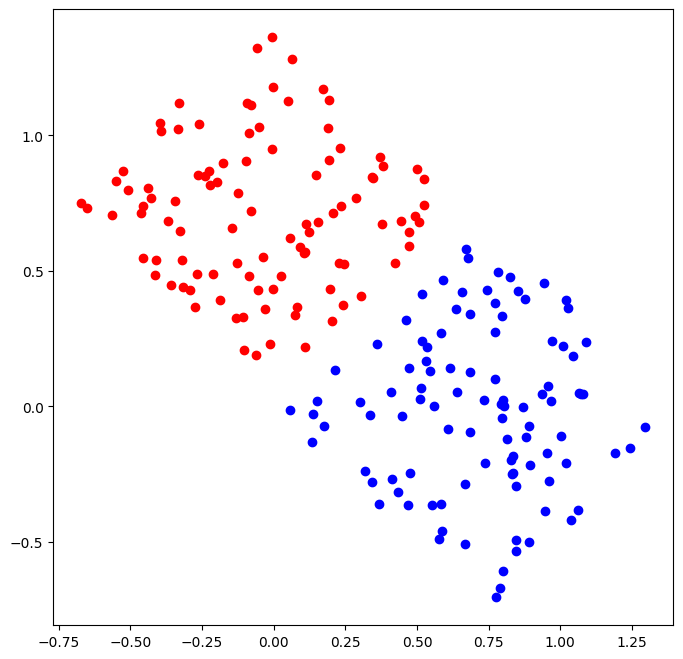

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(X1[:,0],X1[:,1], color='red')
plt.scatter(X2[:,0],X2[:,1], color='blue')

In [3]:
from ipywidgets import interact, IntSlider

@interact
def _(n_steps=IntSlider(0,0,63,1)):
    n_points = X.shape[0]
    W = np.array([0,0,0])
    plt.scatter(X1[:,0],X1[:,1],color='blue')
    plt.scatter(X2[:,0],X2[:,1],color='red')
    
    k = 0
    max_iter=10000
    j = 0
    while ((k < n_steps) and (j < max_iter)):
        i = j % n_points
        j+=1
        if (X[i,:]@W * yall[i] <= 0):
            W = W + X[i,:]*yall[i]
            plt.scatter(X[i,0],X[i,1],color='yellow')
            k+=1
    print(W)
    
    # Plotting the line
    x_left = -2
    x_right = 2
    y_left = 0
    y_right = 0
    if (W[1] != 0):
        y_left = (-W[2] - x_left*W[0])/W[1]
        y_right = (-W[2] - x_right*W[0])/W[1]
    plt.plot([x_left,x_right],[y_left,y_right])
    plt.xlim(-1,2)
    plt.ylim(-1,2)
    plt.show()

interactive(children=(IntSlider(value=0, description='n_steps', max=63), Output()), _dom_classes=('widget-inte…

### Theorem: Perceptron for linearly separable data
> If there exists $w^\ast$ such that $w^\ast \cdot x_i l_i \geq 1$ for all $i$. Then the perceptron algorithm find a $w$ satisfying $w \cdot x_i l_i \geq 0$ for all $i$ in at most $r^2|w^\ast|^2$ updates, where $r = \max_i |x_i|$.

So this theorem guarantees that if the two classes can be separated then the preceptron will also find a separator in finite time.

### Kernels

What about non-linearly separable data. Take for instance
$$
    X = (B_4 \setminus B_3) \cup B_1
$$
and let $c^\ast = B_1$. We cannot separate these sets using a linear classifier

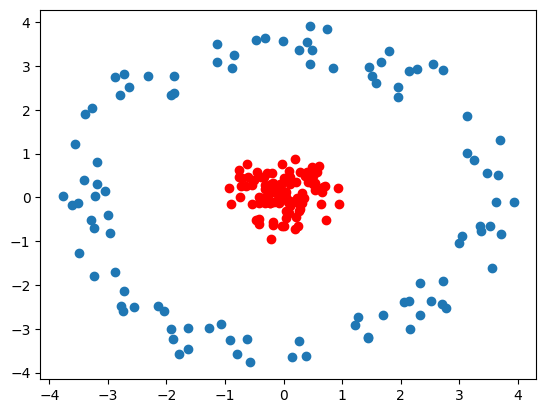

In [4]:
A = np.random.normal(size=(100,2))
A_unit = A/(np.linalg.norm(A,axis=1).reshape(-1,1))
radial_A = 3+np.random.uniform(size=(100,1))
#P=points(A_unit*radial_A,color='blue')
plt.scatter((A_unit*radial_A)[:,0],(A_unit*radial_A)[:,1])

B = np.random.normal(size=(100,2))
B_unit = B/(np.linalg.norm(B,axis=1).reshape(-1,1))
radial_B = np.random.uniform(size=(100,1))
plt.scatter((B_unit*radial_B)[:,0],(B_unit*radial_B)[:,1],color='red')

we can however separate the following mapping of $X$. Namely in $\mathbb R^2$ we can do
$$
    \phi(x) = (x_1,x_2,x_1^2+x_2^2) \in \mathbb R^3
$$
This is clearly linearly separable as we can see in the following 3d plot

In [5]:
import sys, importlib
#importlib.reload(sys.modules['Utils'])

In [6]:
A_2d = A_unit*radial_A
A_3d = np.concatenate([A_2d,np.linalg.norm(A_2d,axis=1).reshape(-1,1)**2],axis=1)
B_2d = B_unit*radial_B
B_3d = np.concatenate([B_2d,np.linalg.norm(B_2d,axis=1).reshape(-1,1)**2],axis=1)

from Utils import scatter3d
fig = scatter3d(A_3d[:,0],A_3d[:,1],A_3d[:,2])
fig = scatter3d(B_3d[:,0],B_3d[:,1],B_3d[:,2],fig=fig,c='red')
fig.show()

For fun let us also try to solve this with SVM where we have selected a kernel as polynomial

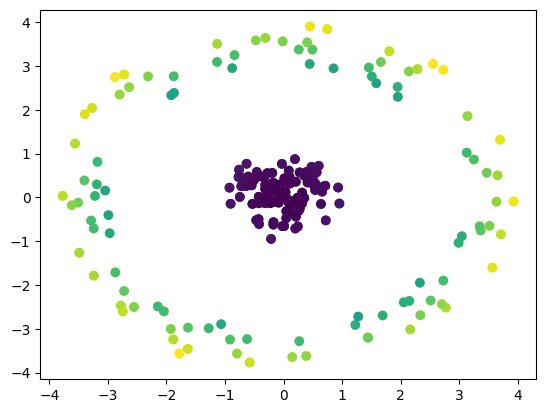

In [7]:
ring_data = np.concatenate([A_2d,B_2d],axis=0)
ring_labels = np.concatenate([np.ones(100),-np.ones(100)])
plt.scatter(ring_data[:,0],ring_data[:,1],c=ring_labels,cmap='viridis')

from sklearn.svm import SVC
clf = SVC(kernel='poly',degree=2)
clf.fit(ring_data,ring_labels)
plt.scatter(ring_data[:,0],ring_data[:,1],c=clf.decision_function(ring_data),cmap='viridis')

> Remember the extra dimension that we always add to simplify notation. Therefore the full $\phi$ in the above examples is $\hat \phi(x) = (x_1,x_2,x_1^2+x_2^2,1)$.

So if we transform the $x \to \phi(x)$ for some good transformation $\phi$ then our perceptron will try to solve
$$
    w \cdot \phi(x_i)l_i > 0
$$
furthermore, remember how we constructed $w$ using the perceptron algorithms, i.e. using additions of $x_i l_i$, which transforms into $\phi(x_i)l_i$, and we start with $w=0$, this gives that the weight has the form
$$
    w = \sum_{i=1}^n c_i \phi(x_i)
$$
for numbers $c_i$. The perceptron algorithm becomes just addition and subtraction of certain $c_i$'s by 1.

Furthermore
$$
    w \cdot \phi(x_i) = \sum_{i=1}^n c_j \phi(x_j) \cdot \phi(x_i) = \sum_{i=1}^n c_i k_{ij}
$$
where $k_{ij} = \phi(x_i) \cdot \phi(x_j)$.

Is it easy to find such a mapping $\phi$? No, it is actually quite difficult. Furthermore, if the mapping $\phi$ is high dimensional we might need to do alot of computation, which is not so efficient. What if we had a function $k(x,y)$ that could be written as
$$
    k(x,y) = \phi(x) \cdot \phi(y)
$$
for some $\phi$ and $k$ is easier to compute, then our life would be simpler. Also, what if we are given a function $k(x,y)$ and we would like to know if it is a "kernel function".

### Lemma
If $k_{ij}$ is symmetric and positive semidefinite, then there is a mapping $\phi$ such that
$k_{ij} = \phi(x_i)\phi(x_j)$.

### Proof
1. $k = Q \Lambda Q^T$ (eigendecomposition)
2. $k$ is positive definite, all eigenvalues $\geq 0$, so we can define $B = Q \Lambda^{1/2}$.
3. $k = B B^T$
4. define $\phi(x_i) = B_{i\cdot}$, i.e. the $i$:th row of $B$, then $k_{ij} = \phi(x_i)\cdot \phi(x_j)$.


We now have a way to identify whenever a matrix $k$ is a kernel matrix. There are some standard choices of kernel functions one could try, that produces positive semi-definite matrices whenever all points $x_i$ are distinct.
1. $k(x,y) = e^{-\gamma |x-y|}$, called Radial Basis Function
2. $k(x,y) = (\gamma x \cdot y + r)^d$, polynomial
3. $k(x,y) = x \cdot y$, linear
4. $k(x,y) = \tanh(\gamma x \cdot y + r)$, sigmoidal


### Definition
> We call a function $k(x,y)$ a kernel function if there is a mapping $\phi$ such that $k(x,y) = \phi(x) \cdot \phi(y)$.

### Theorem (properties)
Suppose $k_1,k_2$ are kernel functions. Then
1. For any constant $c \geq 0$, $c k_1$ is a kernel function.
2. For any scalar function $f$, $k(x,y) = f(x)f(y)k_1(x,y)$ is a kernel function.
3. $k_1 + k_2$ is a kernel function.
4. $k_1k_2$ is a kernel function.

## Let me cheat a bit

As we have noted, the perceptron converges in finite time if the set is linearly separable. The way to solve this problem is to introduce a "cost function" that penalizes misses in classification, the goal is then to minimize the total cost. The perceptron becomes the Support Vector Machine in this case, the loss is the so called "hinge loss"
$$
    \min(0,1-w \cdot x_i l_i)
$$
this means that if $w \cdot x_i l_i \geq 1$ (which is the requirement for the perceptron) we have 0 cost, but if we are closer to the plane $w \cdot x = 0$ then there is a cost proportional to 1 - distance.

Consider the problem of differentiating between the following handwritten digits, where $c^\ast$ is the set of digits greater than or equal to 5.

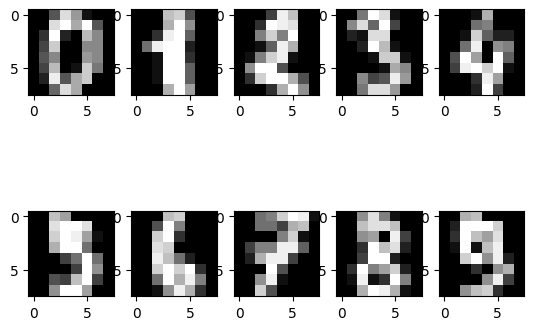

In [8]:
from math import floor
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
fig, ax = plt.subplots(2,5)
plt.gray()
for i in range(10):
    row = floor(i/5)
    column = i % 5
    ax[row,column].imshow(digits['data'][i,:].reshape(8,8))

In [9]:
from sklearn.svm import SVC

labels = digits['target'] > 5

X = digits['data']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,labels,)

per = SVC(kernel='linear')

per.fit(X_train,Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
per.score(X_train,Y_train), per.score(X_test,Y_test)

(0.8856718634001485, 0.9111111111111111)

In [11]:
print("Training precision: \t", per.score(X_train,Y_train))

print("Test precision: \t", per.score(X_test,Y_test))

Training precision: 	 0.8856718634001485
Test precision: 	 0.9111111111111111


This is really interesting right? With just a linear classifier we can differentiate between digits less than and larger than 5 using a linear classifier up to 88% correct...

But, we talked about the fact that different kernels might improve things. A famous kernel is the Radial Basis Function kernel, which we showed above. Lets try it

### The Radial Basis Function Kernel

In [12]:
from sklearn.svm import SVC

labels = digits['target'] > 5

X = digits['data']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,labels)

per = SVC(kernel='rbf')

per.fit(X_train,Y_train)

print("Training precision: \t", per.score(X_train,Y_train))

print("Test precision: \t", per.score(X_test,Y_test))

Training precision: 	 0.9873793615441723
Test precision: 	 0.9866666666666667


This is borderline crazy, how can we differentiate between these digits at 98% accuracy?
I would leave this up to you to think about. But the fact is that it does work well.

## Probabilistic viewpoint

Another model for the pattern recognition problem that has a probabilistic interpretation is the logistic regression (See Chapter 4) in the notes. In this model, we make the ansatz that the target variable, only takes values $0$ or $1$ and thus the conditional distribution of the target given the feature is thus a Bernoulli random variable. The model is thus that the $p$ in the Bernoulli is given as a function of $x$ (the feature). 

Let us consider the following classical wine quality dataset.
This dataset is actually built into sklearn and we can load it as follows

In [13]:
import ssl

import sklearn.datasets as datasets
X, Y = datasets.load_wine(return_X_y=True)

<div class="section" id="wine-recognition-dataset">
<span id="wine-dataset"></span><h3>Wine recognition dataset<a class="headerlink" href="#wine-recognition-dataset" title="Permalink to this headline">¶</a></h3>
<p><strong>Data Set Characteristics:</strong></p>
<blockquote>
<div><dl class="field-list simple">
<dt class="field-odd">Number of Instances</dt>
<dd class="field-odd"><p>178 (50 in each of three classes)</p>
</dd>
<dt class="field-even">Number of Attributes</dt>
<dd class="field-even"><p>13 numeric, predictive attributes and the class</p>
</dd>
<dt class="field-odd">Attribute Information</dt>
<dd class="field-odd"><ul class="simple">
<li><p>Alcohol</p></li>
<li><p>Malic acid</p></li>
<li><p>Ash</p></li>
<li><p>Alcalinity of ash</p></li>
<li><p>Magnesium</p></li>
<li><p>Total phenols</p></li>
<li><p>Flavanoids</p></li>
<li><p>Nonflavanoid phenols</p></li>
<li><p>Proanthocyanins</p></li>
<li><p>Color intensity</p></li>
<li><p>Hue</p></li>
<li><p>OD280/OD315 of diluted wines</p></li>
<li><p>Proline</p></li>
</ul>
</dd>
</dl>
<ul class="simple">
<li><dl class="simple">
<dt>class:</dt><dd><ul>
<li><p>class_0</p></li>
<li><p>class_1</p></li>
<li><p>class_2</p></li>
</ul>
</dd>
</dl>
</li>
</ul>

The wine have been grown by three different cultivators in Italy, the goal is to predict which cultivator actually made the wine base on what we can measure.

We will simplify this problem by making sure that we only have two possible classes, lets try to differentiate between `class_2` and the other cultivators. Lets convert our data so that this is the case

In [14]:
Y_binary = (Y > 1)*1
Y_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [15]:
X.shape # 178 samples and 13 features

(178, 13)

In [16]:
Y_binary.shape # 178 samples

(178,)

We will now try to apply the logistic regression model, recall the logistic function $\frac{1}{1+e^{-x}}$

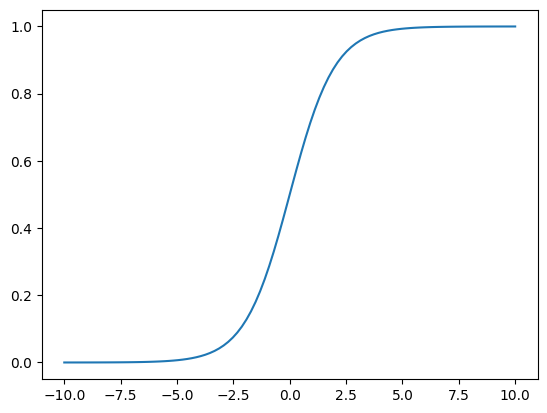

In [17]:
x = np.linspace(-10,10,100)
plt.plot(x,1/(1+np.exp(-x)))

To start, we are going to put everything on unit scale (for us this is only to simplify plotting). The unit scale is done using `StandardScaler` which takes each feature in `X` and rescales so that the mean is zero and standard deviation is $1$.

The second thing we are going to do is to consider only one feature, $X$ has $13$ features, I have for your pleasure chosen the feature with index $9$ (most visual).

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
Y1 = 2*Y_binary-1 # Transform into +-1

In [19]:
# Uncomment and run to understand what it does
#?StandardScaler

In [20]:
import numpy as np
from scipy import optimize

# define the objective/cost/loss function we want to minimise
def f(x):
    return np.sum(np.log(1+np.exp(-Y1*(x[0] + x[1]*X_sc[:,9]))))

# multi-dimensional optimisation is syntactically similar to 1D, 
# but we are using Gradient and Hessian information from numerical evaluation of f to 
# iteratively improve the solution along the steepest direction, etc. 
# It 'LBFGS' method you will see in scientific computing
parameter_bounding_box=((-10, 2), (-10, 2)) # specify the constraints for each parameter
initial_arguments = np.array([0, 0]) # point in 2D to initialise the minimize algorithm
result = optimize.minimize(f, initial_arguments, bounds=parameter_bounding_box,) # just call the minimize method!
result

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 67.326890200812
        x: [-1.433e+00  1.840e+00]
      nit: 8
      jac: [-3.837e-05  1.990e-05]
     nfev: 30
     njev: 10
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

In [21]:
result_func= lambda z: 1/(1+np.exp(-result.x[0]-result.x[1]*z))

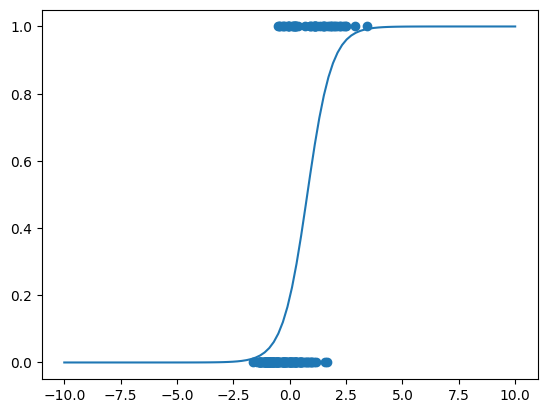

In [22]:
plt.scatter(X_sc[:,9],Y_binary)
plt.plot(x,result_func(x))
#P = points(zip(X_sc[:,9],Y_binary))
#P+= plot(result_func,-10,10)
#P+= plot(0.5,color='grey')
#show(P)

Lets try to do the same thing with the ready made `LogisticRegression` in `sklearn`

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty=None)
logreg.fit(X_sc[:,9].reshape(-1,1),Y_binary)

,penalty,None
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
(logreg.coef_,logreg.intercept_)

(array([[1.8403384]]), array([-1.432872]))

As we can see, we get the same result and it is very easy to write the code. **But now you know what is under the hood, so if you need to apply a different model, you can do it yourself.**